# Data Analysis Project

## Incident Investigation for Online Payment Orchestration company
#### By: Maria Beatriz P. Kasznar
#### Date: 15/09/2025

## Introduction

Payment orchestration is the process of managing various payment methods, payment gateways, payment providers, banks, and issuers and streamlining them from one unified platform.<br>

This project details the investigation of transaction and merchant data to detect a critical incident that occurred between July 2nd and July 15th, 2024.<br>
The objective is to determine:
- The **specific date and time** the incident occurred.
- **How long** the incident lasted.
- **Key patterns and insights** associated with it.

__Given data__:
- Transaction data: main database, with all transactions in the period of 30 days (July 1st until 30th, 2024). It contains information on PSP used, merchant who initiated the transaction, when it was created, processed, and modified, country and currency, status (i.e. approved, declined, refunded, pending, etc.), further details on declined transactions, and amount.
- Merchant data: reference database, with name and industry of merchants.

The database was provided by a real company as part of a hiring process.<br>
A thorough process of masking and anonymization was done to avoid leaking sensitive data.

## Data Wrangling:

### Data Discovery:

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
import os
import datetime
from matplotlib.ticker import FuncFormatter

data_path = r'C:\Users\biaka\OneDrive\Documents\JupyterNotebooks\PaymentIncidentAnalysis\data'
df_file_name = r'assessment_data_modified.csv'
merchants_file_name = r'assessment_merchants_modified.csv'

transactions_df = pd.read_csv(os.path.join(data_path, df_file_name))
merchants_df = pd.read_csv(os.path.join(data_path, merchants_file_name))

In [2]:
df = transactions_df.copy()

In [3]:
print(f"\n\033[1mTransaction data:\033[0m {df.shape[0]:,} rows and {df.shape[1]} columns")
print(f"\033[1mMerchant data:\033[0m {merchants_df.shape[0]:,} rows and {merchants_df.shape[1]} columns\n")


Transaction data: 548,634 rows and 22 columns
Merchant data: 21 rows and 3 columns



In [4]:
pd.set_option('display.max_columns', None)
df.head()

,id,merchant_id,psp_name,amount,amount_1,created,processing_date,modified,merchant_order_id,cashier_session_id,cashier_session_id.1,currency,status,decline_code,decline_reason,payment_method_type,country,credit_card_token,bin,card_type,is_3d_secure,allow_refund
0,GMNU50090441731823,BHSF31681574866744,psp_name 1,10.76,10.76,2024-07-01 00:30:01.639348408+00:00,2024-07-01 00:30:01.587038408+00:00,"{'date_time': datetime.datetime(2023, 4, 1, 0,...",NSXR91316807049341,KCXR19403328100457,PQQP16058674153678,currency 1,declined,20152,Initial 3D-Secure transaction has expired,NaN,country 1,NaN,514750.0,card_type 1,True,False
1,UBOZ03623776335110,BHSF31681574866744,psp_name 2,214.07,214.07,2024-07-01 00:30:03.264754408+00:00,2024-07-01 00:30:03.215233408+00:00,"{'date_time': datetime.datetime(2023, 4, 1, 0,...",UFBR87241355184922,BBVI79337768348368,DBAG55975092913058,currency 2,declined,82,Policy reasons,NaN,country 2,NaN,548901.0,card_type 1,False,False
2,PDSM58534817662882,BHSF31681574866744,psp_name 2,10.04,10.04,2024-07-01 00:30:05.694058408+00:00,2024-07-01 00:30:05.733334408+00:00,"{'date_time': datetime.datetime(2023, 4, 1, 0,...",KVKY25167411064787,QKLH65168787721424,BBCZ52327227624983,currency 3,declined,83,Fraud/Security related reasons,NaN,country 3,NaN,510026.0,card_type 1,False,False
3,TGYE29308347405699,WBFJ33042108342805,psp_name 3,491.12,491.12,2024-07-01 00:31:06.491468408+00:00,2024-07-01 00:31:04.593177408+00:00,"{'date_time': datetime.datetime(2023, 4, 1, 0,...",NUBT45776790292899,CKAP91861818057885,OKLK57593329584004,currency 4,declined,0,Declined by payment system [no decline reason ...,NaN,country 4,NaN,NaN,NaN,False,False
4,HDSJ90544036316539,BHSF31681574866744,psp_name 2,83.96,83.96,2024-07-01 00:31:19.159332408+00:00,2024-07-01 00:31:19.209008408+00:00,"{'date_time': datetime.datetime(2023, 4, 1, 0,...",LLRA42034132089239,MWQU62344552529564,JLAS52719766748220,currency 5,approved,NaN,NaN,NaN,country 5,NaN,475124.0,card_type 3,False,False


In [5]:
merchants_df.head()

,id,merchant_name,industry
0,EYIA79982926956580,merchant_name 1,Ecommerce
1,GXXD30987934850243,merchant_name 2,Ecommerce
2,YTMC11435815244248,merchant_name 3,Ecommerce
3,BHSF31681574866744,merchant_name 4,Ecommerce
4,FKME66324300654234,merchant_name 5,Ecommerce


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548634 entries, 0 to 548633
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    548634 non-null  object 
 1   merchant_id           548634 non-null  object 
 2   psp_name              548634 non-null  object 
 3   amount                548634 non-null  float64
 4   amount_1              548634 non-null  float64
 5   created               548634 non-null  object 
 6   processing_date       548634 non-null  object 
 7   modified              548634 non-null  object 
 8   merchant_order_id     548634 non-null  object 
 9   cashier_session_id    548634 non-null  object 
 10  cashier_session_id.1  548634 non-null  object 
 11  currency              548634 non-null  object 
 12  status                548634 non-null  object 
 13  decline_code          288023 non-null  object 
 14  decline_reason        288118 non-null  object 
 15  

### Data Cleaning:

The following columns have __null values__:
- decline_code
- decline_reason
- payment_method_type
- country
- credit_card_token
- bin
- card_type

In [7]:
null_cols = ['decline_code', 'decline_reason', 'payment_method_type', 'country', 'credit_card_token', 'bin', 'card_type']
total_records = df.shape[0]

for c in null_cols:
    null_records = df[c].isnull().sum()
    null_ratio = null_records/total_records
    print(f"\n\033[1m{c}:\033[0m {100*null_ratio:.2f}% of null values")


decline_code: 47.50% of null values

decline_reason: 47.48% of null values

payment_method_type: 100.00% of null values

country: 0.07% of null values

credit_card_token: 90.42% of null values

bin: 11.27% of null values

card_type: 10.70% of null values


<br>__decline_code and decline_reason__: null values are expected because not all transactions are declined. For example, an approved, a pending or a refunded transaction won't have a decline code returned by the PSP. The breakdown below shows that only 0.09% of declined transactions have no decline code.

In [8]:
declined_null_total_records = df[df.decline_code.isnull()].shape[0]
declined_breakdown = df[df.decline_code.isnull()].groupby('status').id.count().to_frame()
declined_breakdown['percentage'] = (declined_breakdown/declined_null_total_records)
declined_breakdown['percentage'] = declined_breakdown['percentage'].apply(lambda x: f'{x:.2%}')

In [9]:
declined_breakdown[['percentage']].sort_values(by='percentage',ascending=False).style.map(
    lambda _: "background-color: lightblue", subset=(declined_breakdown.index[declined_breakdown.index == 'declined'],)
                                                                                         )

,percentage
status,
approved,78.55%
voided,6.44%
refunded,4.83%
in_process,4.11%
partly_refunded,2.36%
filtered_by_rule,2.17%
pending,1.32%
approved_on_hold,0.12%
declined,0.09%


<br>__payment_method_type__: all values are null, so there's no possible analysis to be done. Ideally this should be investigated during the capture of data.
<br>__country__: very small percentage of null values. If treatment is necessary, the currency column can be a good indicator of location of transaction.
<br>__card_type and bin__: null values are expected because it is only relevant if the transaction was a card payment. For example, an UPI transaction in India or a Boleto transaction in Brazil do not use card, and therefore won't have these 2 informations. Unfortunately, since we don't have the payment mode, it's not possible to do a more detailed analysis.

### Data Enrichment:

The transaction data does not contain the name and industry of the merchants; it only has the id of the merchant.

In [10]:
df.columns, merchants_df.columns

(Index(['id', 'merchant_id', 'psp_name', 'amount', 'amount_1', 'created',
        'processing_date', 'modified', 'merchant_order_id',
        'cashier_session_id', 'cashier_session_id.1', 'currency', 'status',
        'decline_code', 'decline_reason', 'payment_method_type', 'country',
        'credit_card_token', 'bin', 'card_type', 'is_3d_secure',
        'allow_refund'],
       dtype='object'),
 Index(['id', 'merchant_name', 'industry'], dtype='object'))

<br>Even though both datasets have a column named "id", they do not represent the same information.<br>
The correct key between them is "merchant_id" on the transactions, and "id" for merchants.

In [11]:
df = pd.merge(df, merchants_df, left_on=['merchant_id'], right_on=['id'], how='left', suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns, axis=1, inplace=True)
df.rename(columns={'name':'merchant_name'}, inplace=True)

df_cols = df.columns.to_list()

### Data Validation:

The following columns have __incorrect types__:
- **created**: should be *datetime*, not object
- **processing_date**: should be *datetime*, not object
- **modified**: should be *datetime*, not object
- **payment_method_type**: should be *object* (string), not float
- **bin**: should be *object* (string), not float

The column 'modified' has a different format compared to 'created' and 'processing_date'. It requires specific transformation to become a readable date. <br>
The column 'payment_method_type' has no data, and therefore no alteration will be done.

In [12]:
df.created = pd.to_datetime(df.created)
df.processing_date = pd.to_datetime(df.processing_date)
df.bin = df.bin.astype('Int64').astype('str')

In [13]:
df['extract_modified'] = df.modified.str.extract(r'\((.*?)\)')
df['modified'] = pd.to_datetime(df['extract_modified'], format='%Y, %m, %d, %H, %M, %S, %f, tzinfo=<%Z>')
df = df[df_cols]

The following pairs of columns need further investigation:
- __amount__ vs. __amount_1__ 
- __cashier_session_id__ vs. __cashier_session_id.1__

#### Amount
A quick look into the descriptive stats below indicates that there's no difference between them, since all the values are the same.

In [14]:
df[['amount', 'amount_1']].describe()

,amount,amount_1
count,5.486340e+05,5.486340e+05
mean,1.516901e+04,1.516901e+04
std,1.518102e+05,1.518102e+05
min,1.060000e+00,1.060000e+00
25%,1.377100e+02,1.377100e+02
50%,1.417495e+03,1.417495e+03
75%,9.509145e+03,9.509145e+03
max,2.560510e+07,2.560510e+07


In [15]:
print(f"\nNumber of rows with \033[1mdifferent values\033[0m for 'amount' and 'amount_1': {df[df.amount != df.amount_1].shape[0]}\n")


Number of rows with different values for 'amount' and 'amount_1': 0



Even though the data dictionary mentions a difference between them, at least for this dataset it is confirmed that both columns have the same values.<br>
Therefore, all future analysis will be done only with one of the columns ('amount'). 

#### Cashier Session id

This column seems duplicated - it is only mentioned once in the data dictionary, which comes up with the possibility of it being stored twice.<br>
However, the data in the columns is different.<br>

In [16]:
df['cashier_session_id'].nunique(), df['cashier_session_id.1'].nunique()

(392661, 392661)

The fact that the number of unique values for 'cashier_session_id' and 'cashier_session_id.1' indicates that they have a 1:1 mapping, but that's not enough to prove it.

In [17]:
csid_df = df[['cashier_session_id', 'cashier_session_id.1']]
csid_df = csid_df.drop_duplicates()

csid_df_gb = csid_df.groupby('cashier_session_id').count()
csid1_df_gb = csid_df.groupby('cashier_session_id.1').count()

In [18]:
csid_df_gb[csid_df_gb['cashier_session_id.1'] != 1]

,cashier_session_id.1
cashier_session_id,


In [19]:
csid1_df_gb[csid1_df_gb['cashier_session_id'] != 1]

,cashier_session_id
cashier_session_id.1,


To prove the 1:1 mapping, a dataframe with all possible pairs of 'cashier_session_id' and 'cashier_session_id.1' was created. The next step was to group by 'cashier_session_id' and count how many possible values of 'cashier_session_id.1' existed. Finally, we can see that every value of 'cashier_session_id' has 1 and 1 only value of 'cashier_session_id.1'. The same process was applied to 'cashier_session_id.1', with the same result.

Even though these columns apparently store different data, it is unnecessary to use both for analysis. 

## Data Analysis:

With the dataset now clean, the analysis can begin.<br>
While the incident is known to have occurred within the specified timeframe, its exact timing, duration, and nature are yet to be determined. To correctly identify the incident, we can look for abnormal behavior in relevant metrics. For a payment orchestrator like BridgerPay, a important metric is the number of successful transactions, both in total and as a percentage. Also, given the company's retry model, it is important to analyze metrics per session, not only transactions. So, another relevant metric is the average number of transactions per session, wether it was successful or not.

The following metrics will be studied:
1. Total of approved transactions
2. Ratio of approved to total transactions
3. Ratio of approved to total sessions
4. a) Average number of transactions per session
   b) Average number of transactions per approved session

For that, I will use datetime analysis and also descriptive statistics. Even though day-wise trend analysis are more visual and easier to comprehend, since we don't know the duration of the incident, it is possible that a day aggregation will not reveal the incident (it might be significantly shorter than a day). Using a less aggregated analysis, such as per hour or per minute, can create too much noise. Therefore, I'll use both day-aggregated metrics and general descriptive statistics, which won't hide a short incident.

### Metric 1: Total of approved transactions

__Total number of transactions (id) which have status = 'approved'__

In [20]:
total_trans_day = df.groupby(df.created.dt.date).id.count()
approved_trans_day = df[df.status=='approved'].groupby(df.created.dt.date).id.count()

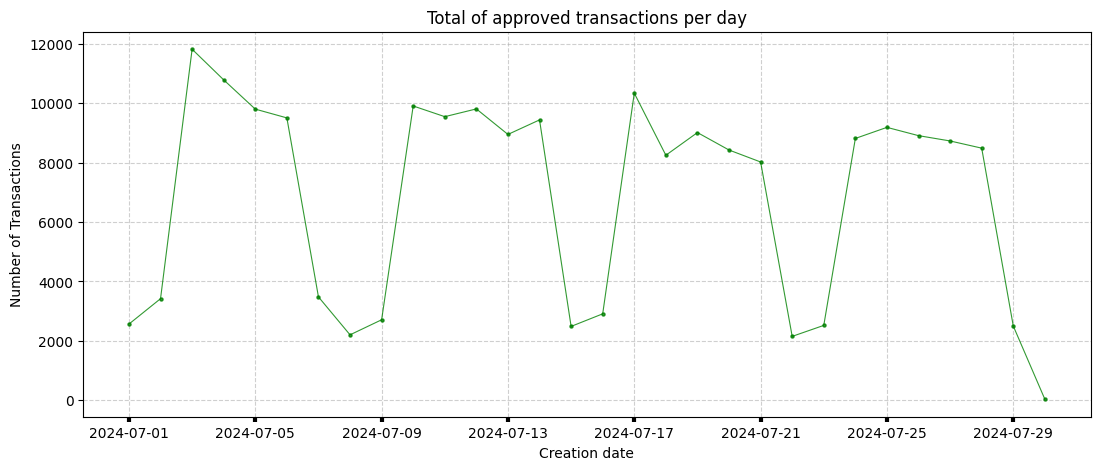

In [21]:
fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Total of approved transactions per day', fontsize=12)

plt.plot(approved_trans_day.index, approved_trans_day.values, '-go', linewidth=0.8, markersize=2.2, alpha=0.8)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)

ax.yaxis.set_label_text('Number of Transactions')
ax.xaxis.set_label_text('Creation date')

plt.show()

### Metric 2: Ratio of approved to total transactions

__Total number of transactions (id) which have status = 'approved' divided by total number of transactions__

In [22]:
ratio_trans_total = df[df.status=='approved'].shape[0]/df.shape[0]

print(f"\n\033[1mRatio of approved to total transactions for the whole dataset: {100*ratio_trans_total:.1f}%\033[0m\n")


Ratio of approved to total transactions for the whole dataset: 37.3%



In [23]:
ratio_trans_day = approved_trans_day/total_trans_day

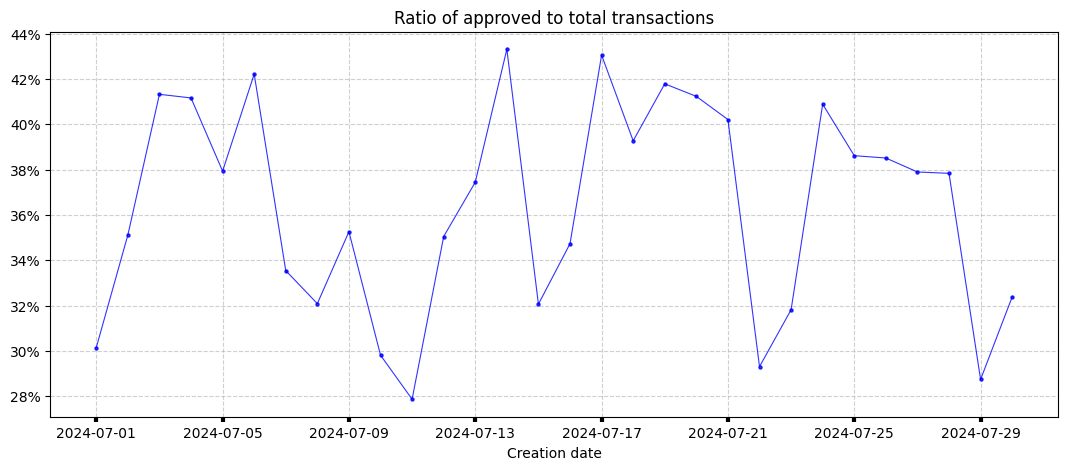

In [24]:
fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Ratio of approved to total transactions', fontsize=12)

plt.plot(ratio_trans_day.index, ratio_trans_day.values, '-bo', linewidth=0.8, markersize=2.2, alpha=0.8)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax.xaxis.set_label_text('Creation date')

plt.show()

### Metric 3: Ratio of approved to total sessions

__Total number of sessions (cashier_session_id) which have at least 1 transaction with status = 'approved' divided by total number of sessions__

In [25]:
ratio_sess_total = df[df.status=='approved'].cashier_session_id.nunique()/df.cashier_session_id.nunique()

print(f"\n\033[1mRatio of approved to total sessions for the whole dataset: {100*ratio_sess_total:.1f}%\033[0m\n")


Ratio of approved to total sessions for the whole dataset: 52.1%



In [26]:
approved_sess_day = df[df.status=='approved'].groupby(df.created.dt.date).cashier_session_id.nunique()
total_sess_day = df.groupby(df.created.dt.date).cashier_session_id.nunique()
ratio_sess_day = approved_sess_day / total_sess_day

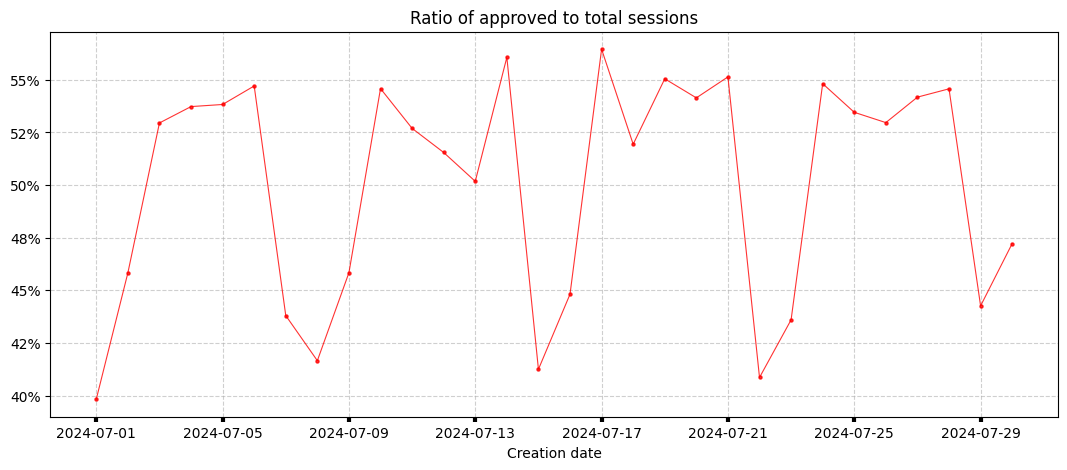

In [27]:
fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Ratio of approved to total sessions', fontsize=12)

plt.plot(ratio_sess_day.index, ratio_sess_day.values, '-ro', linewidth=0.8, markersize=2.2, alpha=0.8, label='Sessions')

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax.xaxis.set_label_text('Creation date')

plt.show()

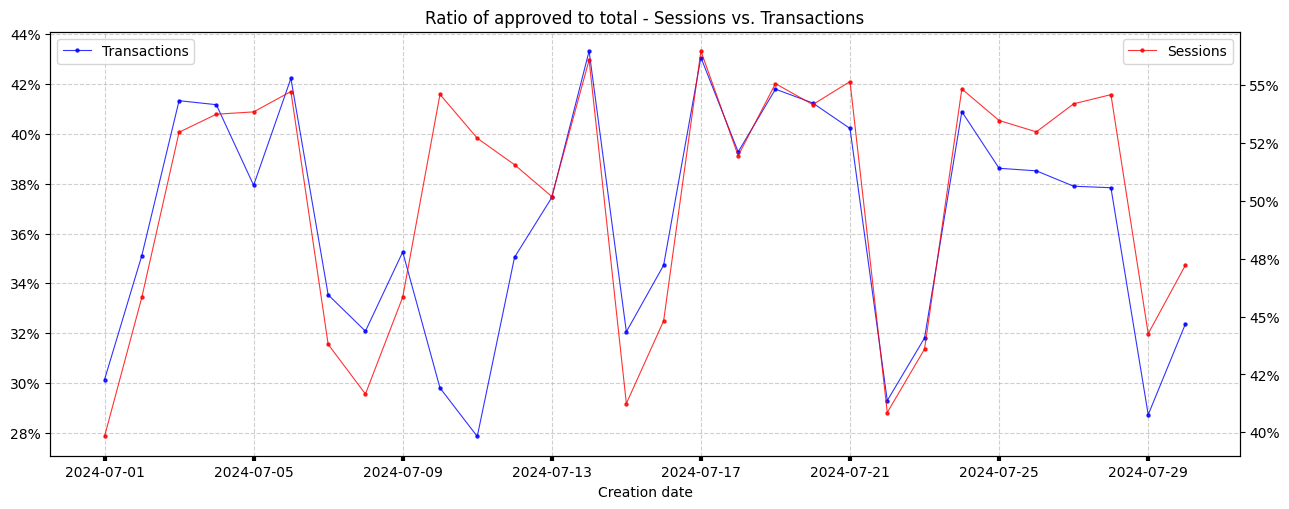

In [28]:
fig, ax1 = plt.subplots(figsize=(13,5))

plt.title('Ratio of approved to total - Sessions vs. Transactions', fontsize=12)

ax1.plot(ratio_trans_day.index, ratio_trans_day.values, '-bo', linewidth=0.8, markersize=2.2, alpha=0.8, label='Transactions')

ax2 = ax1.twinx()
ax2.plot(ratio_sess_day.index, ratio_sess_day.values, '-ro', linewidth=0.8, markersize=2.2, alpha=0.8, label='Sessions')

ax1.yaxis.grid(True, linestyle='--', alpha=0.6)
ax1.xaxis.grid(True, linestyle='--', alpha=0.6)
ax1.xaxis.set_tick_params(width=3)

ax1.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
ax2.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=0)

ax1.xaxis.set_label_text('Creation date')

plt.show()

When analyzing metrics 2 and 3 side by side, we can notice that they usually follow the same pattern. However, on the 10th and 11th, a different behavior is observed: while the percentage of approved sessions was similar to the rest, the percentage of approved transactions went down.<br>
Below, we can see the day-wise difference of metric 2 and 3. The peak on 10th and 11th July stands out; there's also a more subtle peak on July 5th. 

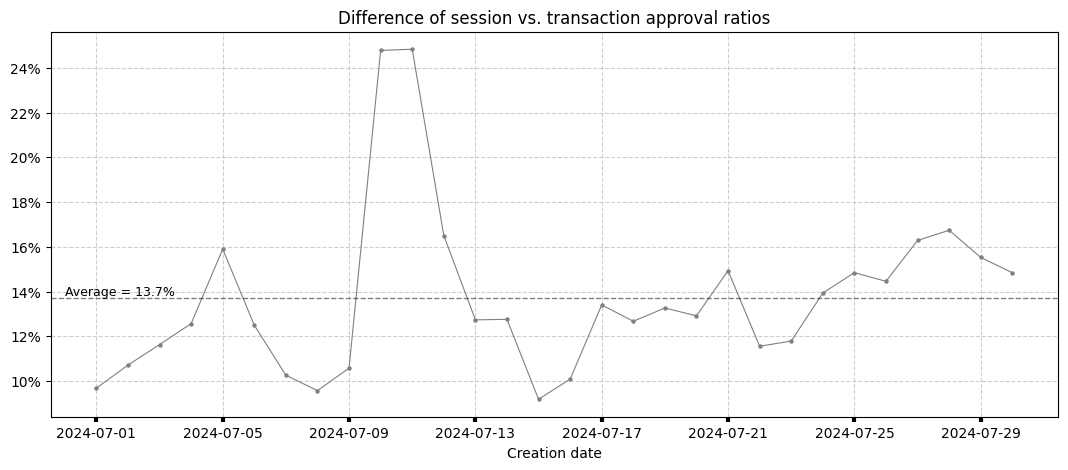

In [29]:
diff_ratio = ratio_sess_day-ratio_trans_day
avg_diff_ratio = diff_ratio.mean()

fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Difference of session vs. transaction approval ratios', fontsize=12)

plt.plot(diff_ratio.index, diff_ratio.values, color='gray', marker='o', linewidth=0.8, markersize=2.2)
plt.axhline(y=avg_diff_ratio, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.annotate('Average = '+'{:,.1%}'.format(avg_diff_ratio), xy=(19904, 1.008*avg_diff_ratio), fontsize=9)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax.xaxis.set_label_text('Creation date')

plt.show()

### Metric 4.a: Average number of transactions per session

__Number of transactions (id) per session (cashier_session_id)__

This metric is calculated by grouping the dataset per session, and then counting how many transactions each one had.<br>
As shown below, there are 392,661 sessions in the dataset. Only 1 transaction per session is the most observed case, but there are outliers, like the maximum value of 630 transactions in 1 session. 

In [30]:
attempts_per_session = df.groupby('cashier_session_id').id.count().to_frame().sort_values(by='id', ascending=False)
attempts_per_session.describe()

,id
count,392661.000000
mean,1.397221
std,1.823798
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,630.000000


The histogram below shows that 75.6% (296,611 out of 392,661) of sessions have only 1 transaction.<br>
Up to 5 transactions can still be considered normal. 2 to 5 transactions per session sums up to 24.1% of the database (94,784 records). Beyond that, there are very few instances.<br><br>

Attention! The x-axis has been limited. The original histogram is heavly right-skewed, and showing the sparse data created too much noise. Still, it is very clear that number of transactions = 1 has the highest frequency of all.

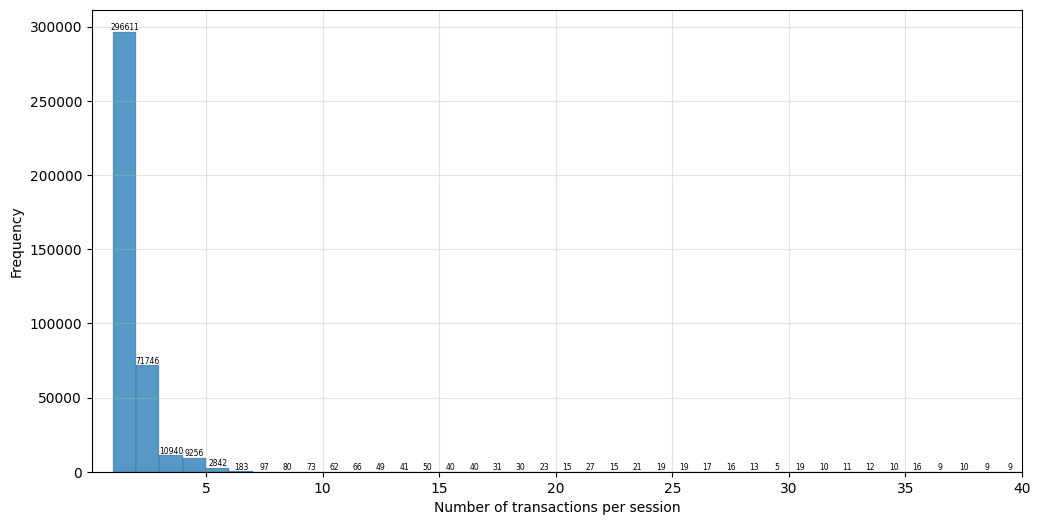

In [31]:
plt.figure(figsize=(12,6))

grid = sns.histplot(data=attempts_per_session, x='id', binwidth=1)

labels = [str(v) if v else '' for v in grid.containers[0].datavalues]
grid.bar_label(grid.containers[0], labels=labels, size=5.5)

plt.xlim([0.1,40])
plt.xlabel('Number of transactions per session')
plt.ylabel('Frequency')
plt.grid(alpha=0.35)

plt.show()

The above analysis were built on non-aggregated data. Now, I will aggregate it by day, and then calculate the metric.<br> 
For each day, I calculated the total number of sessions and the total number of transactions.<br>
Then, I divided transactions by sessions, arriving on the desired metric of **average number of transactions per session per day**. 

In [32]:
avg_attempts_per_session = df.groupby(df.created.dt.date).agg(
                                                                count_sessions=('cashier_session_id', 'nunique'),
                                                                count_transactions=('id', 'nunique')
                                                             )

avg_attempts_per_session['avg_trans_per_sess'] = avg_attempts_per_session.count_transactions/avg_attempts_per_session.count_sessions

In [33]:
avg_attempts_per_session.head()

,count_sessions,count_transactions,avg_trans_per_sess
created,,,
2024-07-01,6438,8506,1.321218
2024-07-02,7461,9737,1.305053
2024-07-03,22320,28601,1.281407
2024-07-04,20076,26205,1.305290
2024-07-05,18209,25840,1.419078


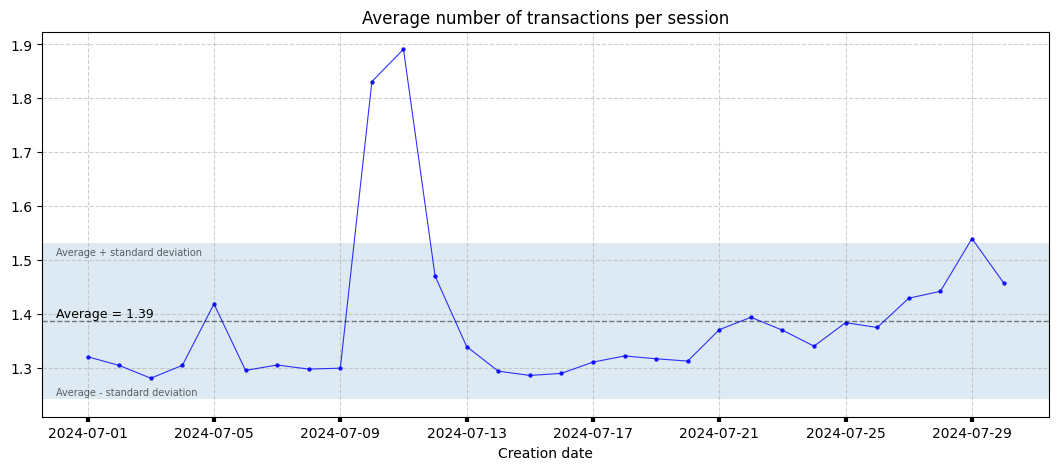

In [34]:
mean = avg_attempts_per_session.avg_trans_per_sess.mean()
std = avg_attempts_per_session.avg_trans_per_sess.std()
range = [mean-std, mean+std]

fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Average number of transactions per session', fontsize=12)

plt.plot(avg_attempts_per_session.index, avg_attempts_per_session.avg_trans_per_sess, '-bo', linewidth=0.8, markersize=2.2, alpha=0.8)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)

ax.axhline(y=mean, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.annotate('Average = '+'{:,.3}'.format(mean), xy=(19904, 1.005*mean), fontsize=9)

ax.axhspan(range[0], range[1], alpha=0.15)
ax.annotate('Average + standard deviation', xy=(19904, 0.985*range[1]), fontsize=7, alpha=0.6)
ax.annotate('Average - standard deviation', xy=(19904, 1.005*range[0]), fontsize=7, alpha=0.6)
ax.xaxis.set_label_text('Creation date')

plt.show()

This metric by itself shows an unexpected behaviour on the 10th and 11th of July. The average of transactions per session is far above the mean, even when considering one standard deviation.<br>
It's also important to highlight that, since these 2 outliers are included in the calculation of the mean and std, these statistics are already higher than they should be if calculated only on normal data points.

### Metric 4.b: Average number of transactions per approved session

__Number of transactions (id) per sessions that were approved (cashier_session_id)__

Just like the previous metric, we see that most sessions that end up being approved had only 1 transaction. Compared to metric 4.a, this has a lower mean and standard deviation, which means it is even more frequent to see sessions with only 1 transaction than in the previous metric. Here, the max value observed is 24, far lower than 630. It is still quite high, though. 

In [35]:
array_approved_sessions = df[df.status=='approved'].cashier_session_id.unique()
attempts_per_approved_session = df[df.cashier_session_id.isin(array_approved_sessions)].groupby('cashier_session_id').id.count().to_frame()

attempts_per_approved_session.describe()

,id
count,204720.000000
mean,1.106091
std,0.380536
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,24.000000


In [36]:
avg_attempts_per_approved_session = df[df.cashier_session_id.isin(array_approved_sessions)].groupby(df.created.dt.date).agg(
                                                                        count_sessions=('cashier_session_id', 'nunique'),
                                                                        count_transactions=('id', 'nunique')
                                                                                                                           )

avg_attempts_per_approved_session['avg_trans_per_approved_sess'] = avg_attempts_per_approved_session.count_transactions/avg_attempts_per_approved_session.count_sessions

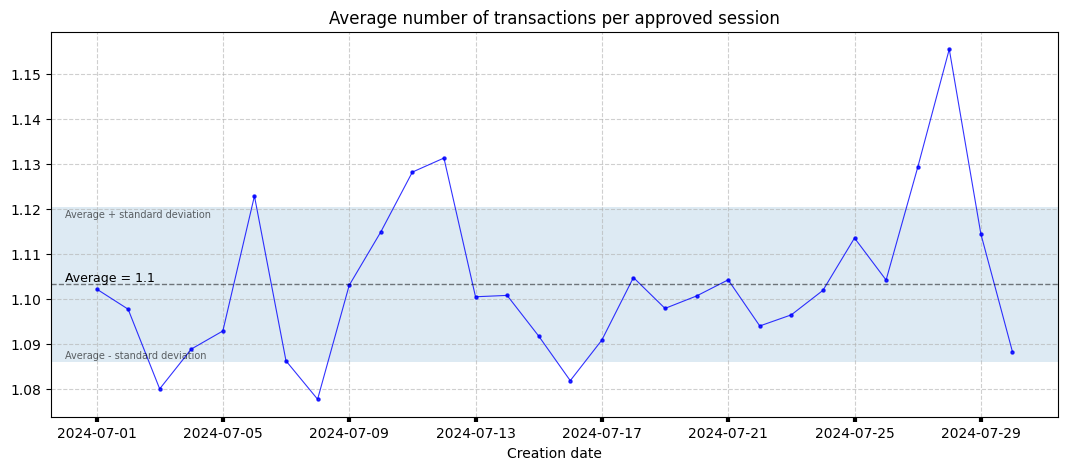

In [37]:
mean_approved = avg_attempts_per_approved_session.avg_trans_per_approved_sess.mean()
std_approved = avg_attempts_per_approved_session.avg_trans_per_approved_sess.std()
range_approved = [mean_approved-std_approved, mean_approved+std_approved]

fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Average number of transactions per approved session', fontsize=12)

plt.plot(avg_attempts_per_approved_session.index, avg_attempts_per_approved_session.avg_trans_per_approved_sess, '-bo', linewidth=0.8, markersize=2.2, alpha=0.8)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)

ax.axhline(y=mean_approved, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.annotate('Average = '+'{:,.3}'.format(mean_approved), xy=(19904, 1.0007*mean_approved), fontsize=9)

ax.axhspan(range_approved[0], range_approved[1], alpha=0.15)
ax.annotate('Average + standard deviation', xy=(19904, 0.998*range_approved[1]), fontsize=7, alpha=0.6)
ax.annotate('Average - standard deviation', xy=(19904, 1.0006*range_approved[0]), fontsize=7, alpha=0.6)
ax.xaxis.set_label_text('Creation date')

plt.show()

For this metric, there are no very distinct outliers within the possible incident time range. There are some values that slightly deviate from the average, but in absolute terms the difference is quite small. Take July 11th, for example: it might be outside the highlighted range, but the difference to the average is of only 0.02499 (2.27% of the average).

## Incident Analysis:

The initial analysis of Metric 1 did not indicate a potential problem.<br>
While Metric 2 showed a slight drop on days 10 and 11, it was not conclusive on its own.<br>
The incident became more apparent when comparing Metric 3 with Metric 2, as this revealed a very different profile for transactions versus sessions on those two days. This finding was confirmed by Metric 4a, which made it very clear that a specific incident occurred on the 10th and 11th of July.<br>
The problem appears to be related to unapproved sessions, as Metric 4b did not show a similar decline as 4a.

Below I have repeated the time series analysis presented for metric 4a.<br>
It is clear that the average number of transactions on the highlighted days is not within expected, as it goes beyond 3 standard deviations from the average.

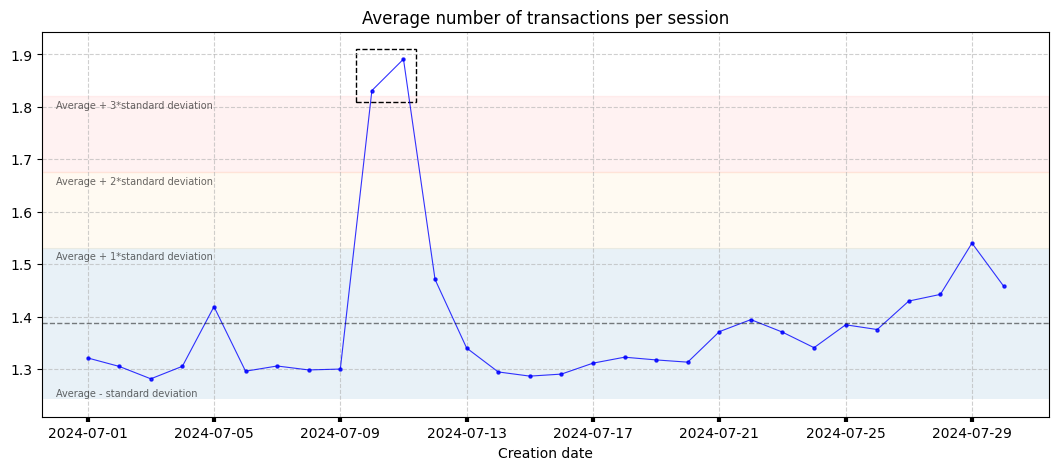

In [38]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(13,5))
ax = fig.gca()

plt.title('Average number of transactions per session', fontsize=12)

plt.plot(avg_attempts_per_session.index, avg_attempts_per_session.avg_trans_per_sess, '-bo', linewidth=0.8, markersize=2.2, alpha=0.8)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.set_tick_params(width=3)

ax.axhline(y=mean, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.annotate('Average = '+'{:,.3}'.format(mean), xy=(19447, 1.005*mean), fontsize=9)

ax.axhspan(range[0], range[1], alpha=0.1)
ax.axhspan(range[1], range[1]+std, color='orange', alpha=0.05)
ax.axhspan(range[1]+std, range[1]+2*std, color='red', alpha=0.05)

ax.annotate('Average + 1*standard deviation', xy=(19904, 0.985*range[1]), fontsize=7, alpha=0.6)
ax.annotate('Average - standard deviation', xy=(19904, 1.005*range[0]), fontsize=7, alpha=0.6)
ax.annotate('Average + 2*standard deviation', xy=(19904, 0.985*range[1]+1*std), fontsize=7, alpha=0.6)
ax.annotate('Average + 3*standard deviation', xy=(19904, 0.985*range[1]+2*std), fontsize=7, alpha=0.6)

left, bottom, width, height = (19913.5, 1.81, 1.9, 0.1)
rect = mpatches.Rectangle((left, bottom), width, height, fill=False, alpha=1, ls="--")
ax.add_patch(rect)

ax.xaxis.set_label_text('Creation date')

plt.show()

Now we focus on that specific period of time and investigate the data points behind the metric.<br>
On the graphic below, each circle represents a session. The y-axis shows how many transactions happened during that session.<br>
A new observation can be made here: the 12th also had a significant amount of unusual sessions. On the other side, the metrics for that day do not stand out. The problem was probably detected early that day, which led to its metrics slowly coming back to normal.<br> 
The maximum value observed on the whole dataset happened on July 10th. **This specific session with 630 transactions is our main incident.**

In [39]:
transactions_per_session = df.groupby([df.created.dt.date, df.cashier_session_id]).id.count()
transactions_per_session = transactions_per_session.to_frame().reset_index()

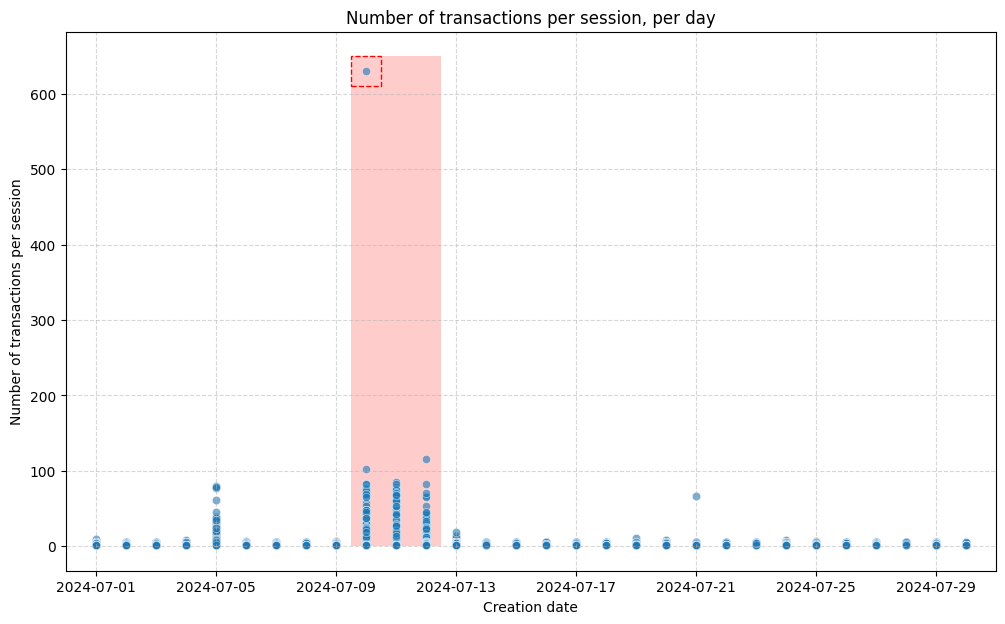

In [40]:
fig, ax = plt.subplots(figsize=(12, 7))

left1, bottom1, width1, height1 = (19913.5, 0, 3, 650)
rect1 = mpatches.Rectangle((left1,bottom1),width1,height1, alpha=0.2, facecolor="red")
ax.add_patch(rect1)

left2, bottom2, width2, height2 = (19913.5, 610, 1, 40)
rect2 = mpatches.Rectangle((left2,bottom2),width2,height2, fill=False, alpha=1, ls="--", color='red')
ax.add_patch(rect2)

sns.scatterplot(data=transactions_per_session, x='created', y='id', alpha=0.6)

plt.xlim(datetime.date(2024, 6, 30), datetime.date(2024, 7, 31))

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.yaxis.set_label_text('Number of transactions per session')

ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.set_label_text('Creation date')

plt.title('Number of transactions per session, per day')

plt.show()

Now that the main incident has been identified, we can answer the questions:

#### Question 1: When did the incident occurr? 

In [41]:
incident_cashiersessionid = attempts_per_session.index[0]
incident_start = df[df.cashier_session_id == incident_cashiersessionid].created.min()
incident_end = df[df.cashier_session_id == incident_cashiersessionid].created.max()

In [42]:
print(f"\n\033[1mThe incident occured from {incident_start} to {incident_end}.\033[0m\n")


The incident occured from 2024-07-10 11:22:07.872164408+00:00 to 2024-07-10 12:27:36.947467408+00:00.



#### Question 2: How long did the incident last?

In [43]:
incident_duration = incident_end - incident_start

In [44]:
print(f"\n\033[1mThe incident lasted for {incident_duration}.\033[0m\n")


The incident lasted for 0 days 01:05:29.075303.



#### Question 3: Patterns and insights

As mentioned before, the main incident is part of a bigger group of unusual observations which happened mainly on July 10th and 11th.<br>
Now we will take a deeper look into those anomalies, by analyzing where they came from, which merchants were involved, which card was mostly used, etc.

In [45]:
outlier_sessions = attempts_per_session[attempts_per_session.id>5].index.to_list()

df_incident = df[(df.created.dt.tz_localize(None)>=datetime.datetime(2024,7,10)) 
                  & 
                 (df.created.dt.tz_localize(None)<datetime.datetime(2024,7,13))
                  &
                 (df.cashier_session_id.isin(outlier_sessions))
                ]

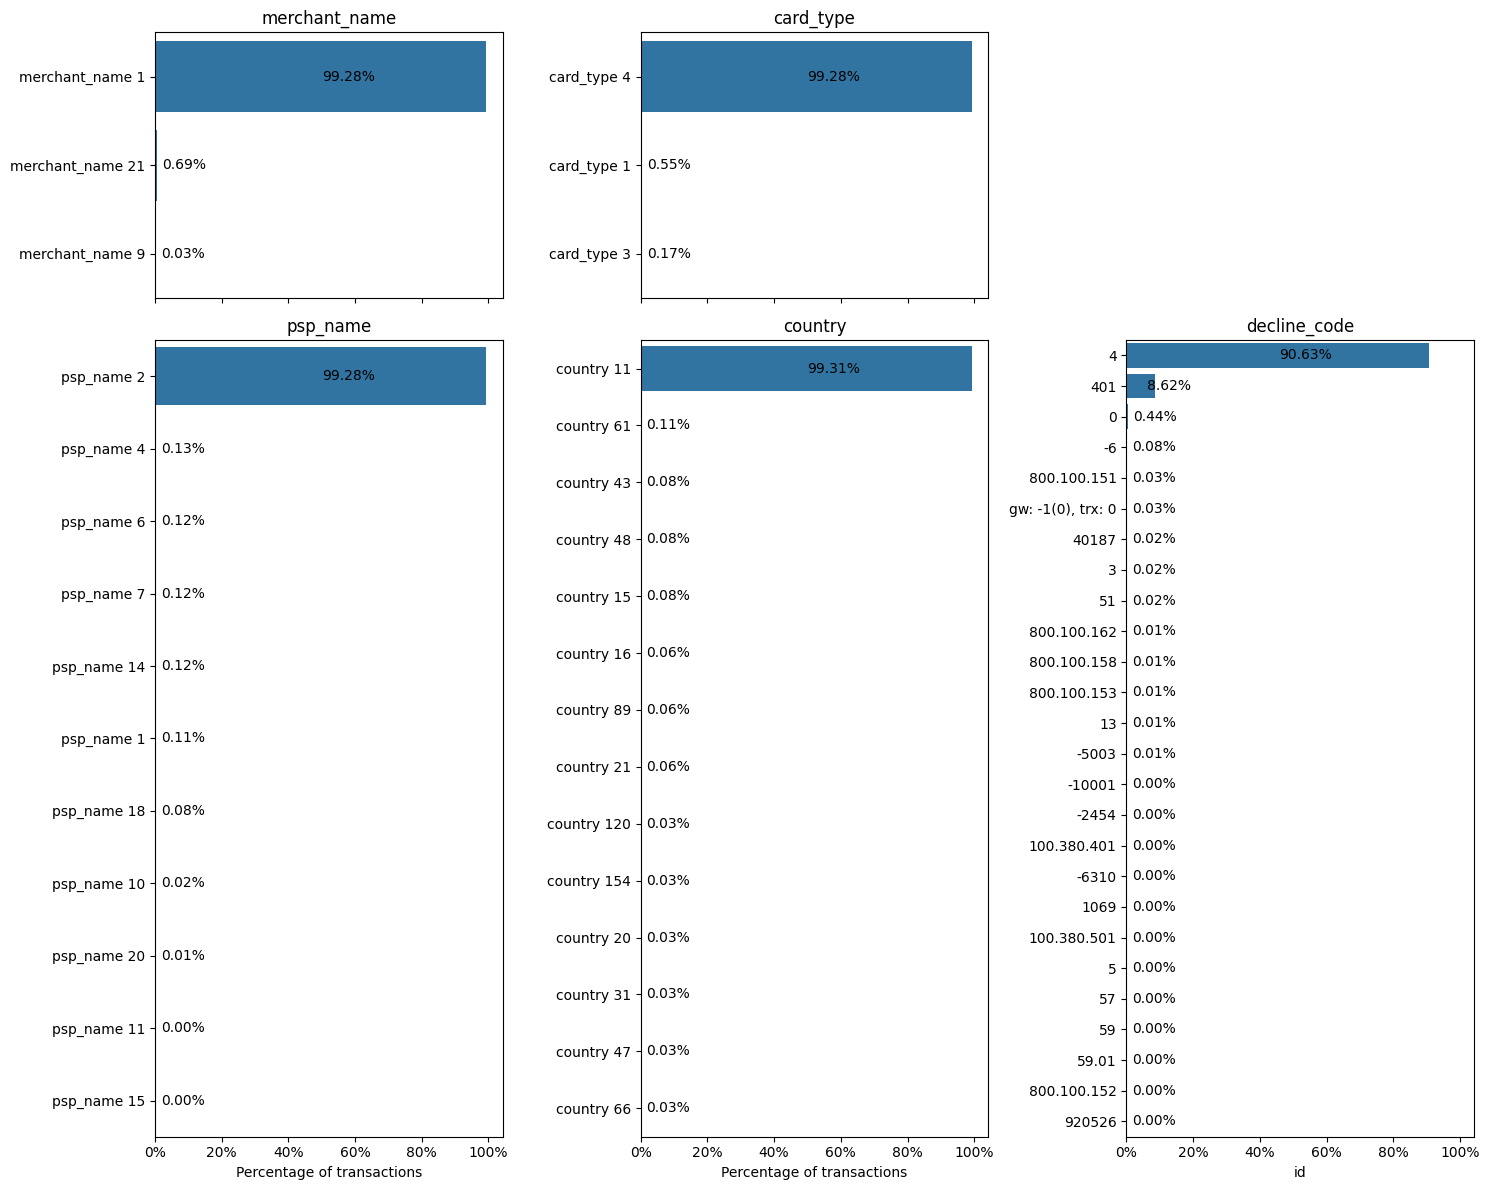

In [46]:
cols_analysis = ['merchant_name', 'card_type', 'status', 'psp_name', 'country', 'decline_code']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.delaxes(axes[0,2])

for c, ax in zip(cols_analysis, axes.ravel()):
    df_incident_analysis = df_incident.groupby(c).id.count().sort_values(ascending=False)
    analysis_total = df_incident_analysis.sum()
    df_incident_analysis_perc = df_incident_analysis/analysis_total
    sns.barplot(data=pd.DataFrame(df_incident_analysis_perc), x='id', y=c, ax=ax)
    ax.bar_label(ax.containers[0], fmt='{0:.2%}', label_type='center', padding=20)
    ax.set_ylabel(ylabel=None)
    ax.set_title(c)

ax1_bottom = axes[1][0]
ax1_bottom.set_xlabel("Percentage of transactions")
ax1_bottom.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax2_bottom = axes[1][1]
ax2_bottom.set_xlabel("Percentage of transactions")
ax2_bottom.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

plt.tight_layout()
plt.show()

In [47]:
df_incident[df_incident.decline_code=='4'].groupby('decline_reason').decline_reason.count()

decline_reason
Declined by 3-D Secure        1
Security violation        18858
Name: decline_reason, dtype: int64

The bar plots above show that the majority of outliers can be clustered into 1 major group that has the following features:
- Merchant: **merchant_name 1**
- Card Type: **card_type 4** 
- PSP: **psp_name 2** 
- Country: **country 11**
- Decline Code: **4 (Security Violation)**

We can also make a point that the incident was not that 1 extremely long session with 630 transactions, but the whole group of almost identical transactions that happened together. In that scenario, the answers would be: 

In [48]:
filter = ((df_incident.merchant_name=='merchant_name 1') &
         (df_incident.card_type=='card_type 4')    &
         (df_incident.psp_name=='psp_name 2')    &
         (df_incident.country=='country 11')  &
         (df_incident.decline_code=='4'))

start = df_incident[filter].created.min()
end = df_incident[filter].created.max()
duration = end - start

In [49]:
print("\n\033[1mQuestion 1: When did the incident occurr?\033[0m")
print(f"\n\033[1mThe incident occured from {start} to {end}.\033[0m\n")


Question 1: When did the incident occurr?

The incident occured from 2024-07-10 10:33:45.909752408+00:00 to 2024-07-11 22:32:45.273851408+00:00.



In [50]:
print("\n\033[1mQuestion 2: How long did the incident last?\033[0m")
print(f"\n\033[1mThe incident lasted for {duration}.\033[0m\n")


Question 2: How long did the incident last?

The incident lasted for 1 days 11:58:59.364099.



The last important insight to mention is that a similar set of transactions happened on the 5th. When comparing metrics 2 and 3, a peak on that day was observed. By analyzing it into details, those transactions belong to the same cluster of the incident. This information could've been used by a ML/AI model to prevent it from happening again. 

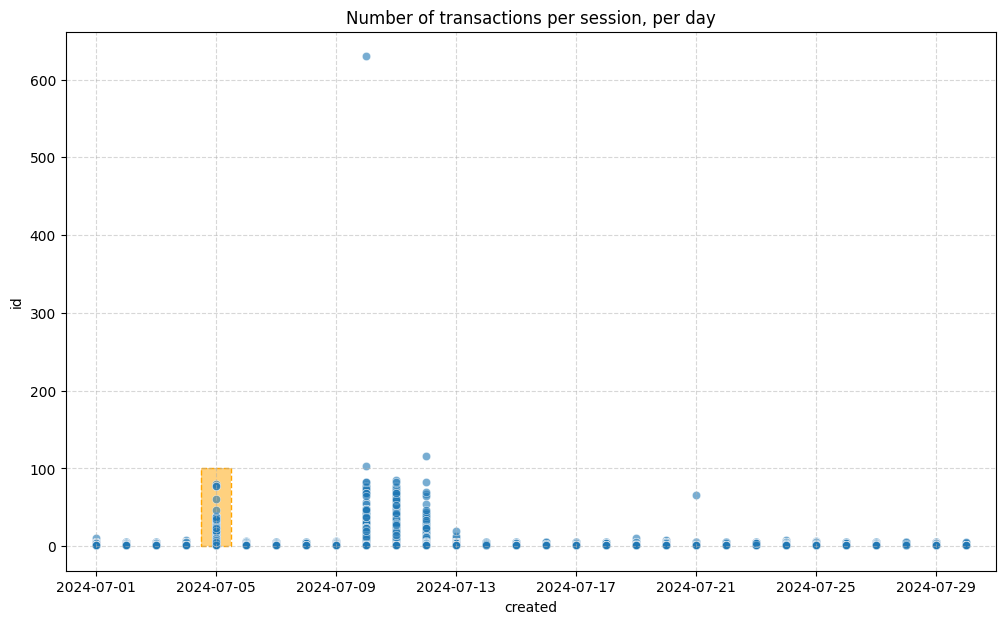

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))

left2, bottom2, width2, height2 = (19908.5, 0, 1, 100)
rect2 = mpatches.Rectangle((left2,bottom2),width2,height2, alpha=0.5, facecolor="orange")
ax.add_patch(rect2)

left3, bottom3, width3, height3 = (19908.5, 0, 1, 100)
rect = mpatches.Rectangle((left3, bottom3), width3, height3, fill=False, alpha=1, ls="--", color='orange')
ax.add_patch(rect)

sns.scatterplot(data=transactions_per_session, x='created', y='id', alpha=0.6)

plt.xlim(datetime.date(2024, 6, 30), datetime.date(2024, 7, 31))

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(True, linestyle='--', alpha=0.5)

plt.title('Number of transactions per session, per day')

plt.show()

In [52]:
df_incident_5th = df[(df.created.dt.tz_localize(None)>=datetime.datetime(2024,7,5)) 
                  & 
                 (df.created.dt.tz_localize(None)<datetime.datetime(2024,7,6))
                  &
                 (df.cashier_session_id.isin(outlier_sessions))
                ]

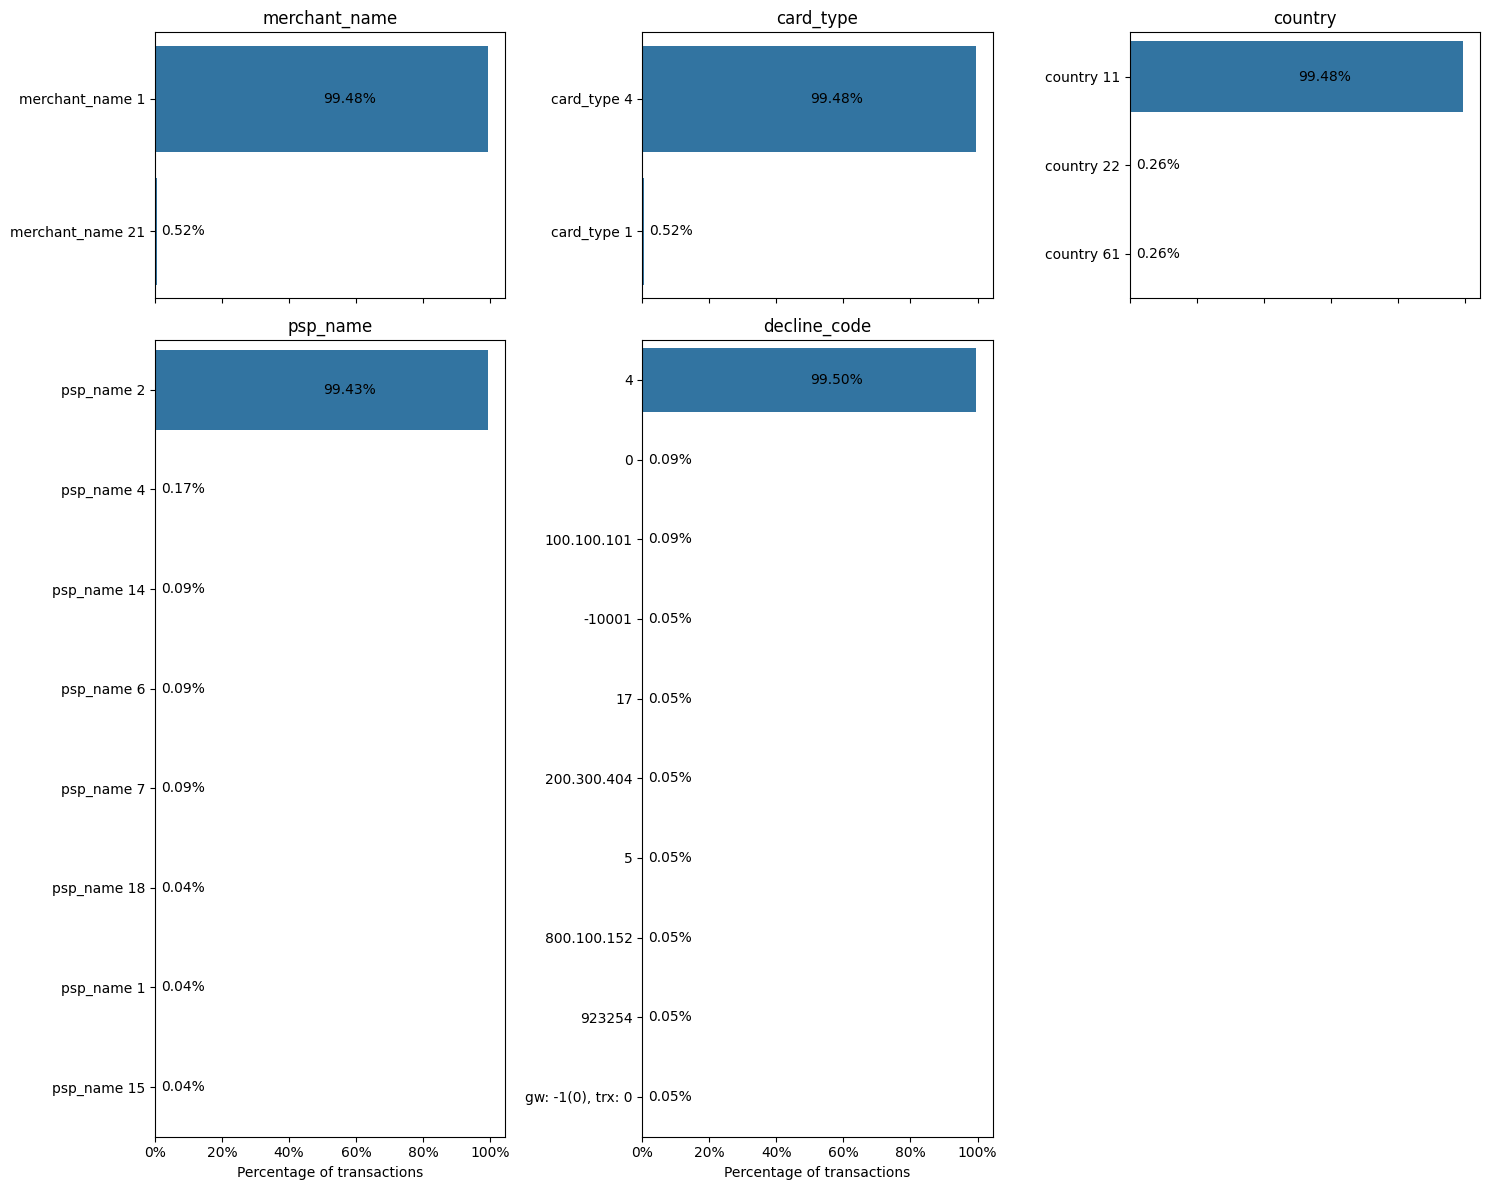

In [53]:
cols_analysis = ['merchant_name', 'card_type', 'country', 'psp_name', 'decline_code']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
fig.delaxes(axes[1,2])

for c, ax in zip(cols_analysis, axes.ravel()):
    df_incident_analysis = df_incident_5th.groupby(c).id.count().sort_values(ascending=False)
    analysis_total = df_incident_analysis.sum()
    df_incident_analysis_perc = df_incident_analysis/analysis_total
    sns.barplot(data=pd.DataFrame(df_incident_analysis_perc), x='id', y=c, ax=ax)
    ax.bar_label(ax.containers[0], fmt='{0:.2%}', label_type='center', padding=20)
    ax.set_ylabel(ylabel=None)
    ax.set_title(c)

ax1_bottom = axes[1][0]
ax1_bottom.set_xlabel("Percentage of transactions")
ax1_bottom.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

ax2_bottom = axes[1][1]
ax2_bottom.set_xlabel("Percentage of transactions")
ax2_bottom.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

plt.tight_layout()
plt.show()